In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataframe= pd.read_csv(r"C:\Users\KHUSHI\Documents\Python Scripts\IRIS.csv")
dataframe

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
print(dataframe.shape)

(150, 5)


In [4]:
print(dataframe.columns)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [5]:
dataframe["species"].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: species, dtype: int64

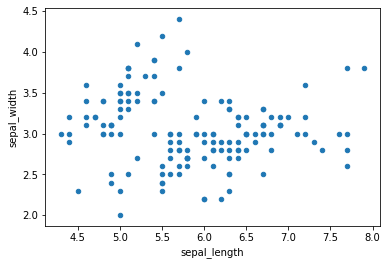

In [6]:
dataframe.plot(kind='scatter',x='sepal_length',y='sepal_width');
plt.show()

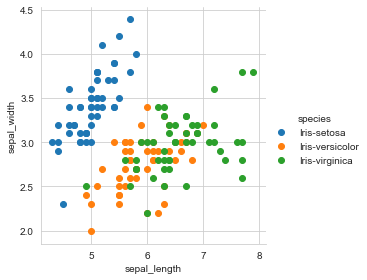

In [7]:
sns.set_style("whitegrid");
sns.FacetGrid(dataframe,hue="species",height=4) \
   .map(plt.scatter, "sepal_length","sepal_width") \
   .add_legend();
plt.show()

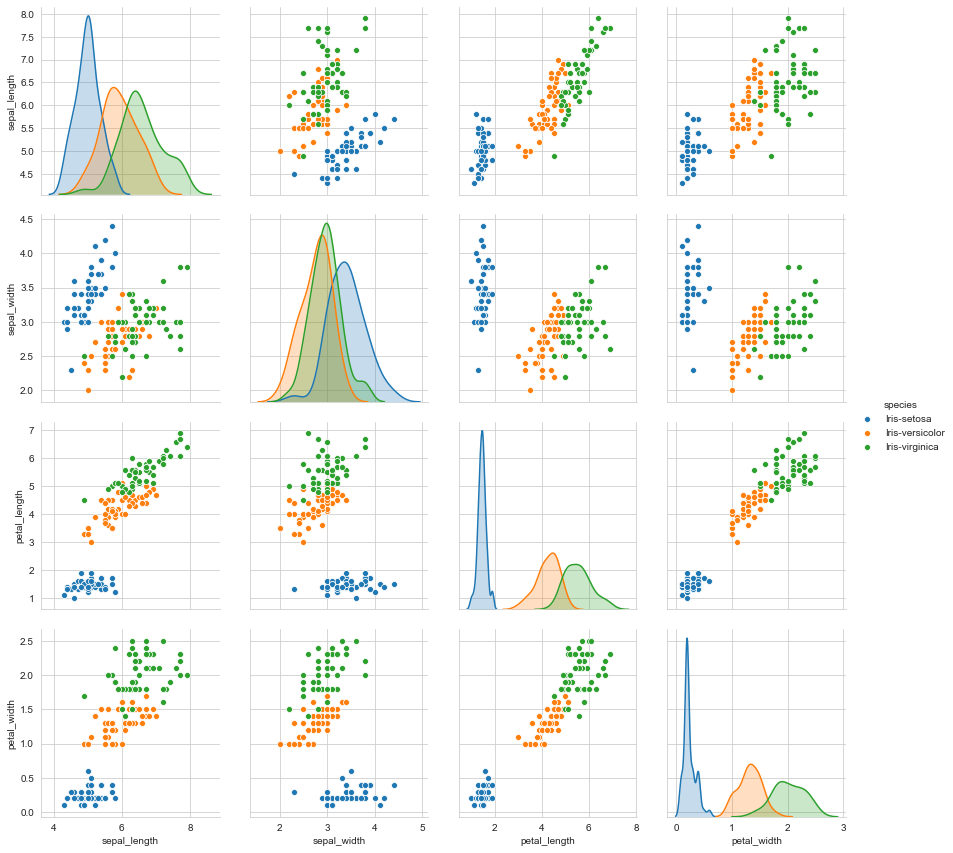

In [8]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(dataframe,hue="species",height=3);
plt.show()

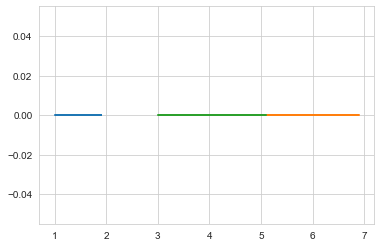

In [9]:
iris_setosa=dataframe.loc[dataframe["species"]=="Iris-setosa"];
iris_virginica=dataframe.loc[dataframe["species"]=="Iris-virginica"];
iris_versicolor=dataframe.loc[dataframe["species"]=="Iris-versicolor"];
plt.plot(iris_setosa["petal_length"],np.zeros_like(iris_setosa['petal_length']))
plt.plot(iris_virginica["petal_length"],np.zeros_like(iris_virginica['petal_length']))
plt.plot(iris_versicolor["petal_length"],np.zeros_like(iris_versicolor['petal_length']))
plt.show()

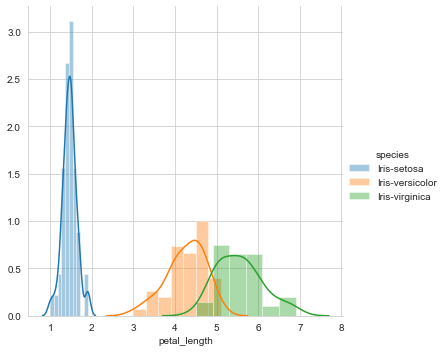

In [10]:
sns.FacetGrid(dataframe,hue="species",height=5) \
   .map(sns.distplot,"petal_length") \
   .add_legend();
plt.show()

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


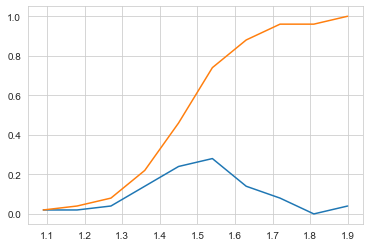

[0.02 0.1  0.24 0.08 0.18 0.16 0.1  0.04 0.02 0.06]
[4.5  4.74 4.98 5.22 5.46 5.7  5.94 6.18 6.42 6.66 6.9 ]


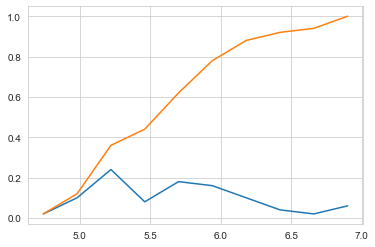

[0.02 0.04 0.06 0.04 0.16 0.14 0.12 0.2  0.14 0.08]
[3.   3.21 3.42 3.63 3.84 4.05 4.26 4.47 4.68 4.89 5.1 ]


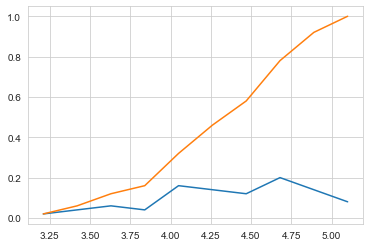

In [18]:
counts,bin_edges=np.histogram(iris_setosa['petal_length'],bins=10,density=True)
pdf=counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.show()
counts,bin_edges=np.histogram(iris_virginica['petal_length'],bins=10,density=True)
pdf=counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.show()

counts,bin_edges=np.histogram(iris_versicolor['petal_length'],bins=10,density=True)
pdf=counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.show()


In [19]:
print("Mean:")
print(np.mean(iris_setosa["petal_length"]))
print(np.mean(iris_virginica["petal_length"]))
print(np.mean(iris_versicolor["petal_length"]))

Mean:
1.464
5.552
4.26


In [21]:
print("Standard deviation")
print(np.std(iris_setosa["petal_length"]))
print(np.std(iris_virginica["petal_length"]))
print(np.std(iris_versicolor["petal_length"]))

Standard deviation
0.17176728442867115
0.5463478745268441
0.4651881339845204


In [23]:
print("Variance")
print(np.var(iris_setosa["petal_length"]))
print(np.var(iris_virginica["petal_length"]))
print(np.var(iris_versicolor["petal_length"]))

Variance
0.02950400000000001
0.2984960000000002
0.21640000000000012


In [22]:
print("Median:")
print(np.median(iris_setosa["petal_length"]))
print(np.median(iris_virginica["petal_length"]))
print(np.median(iris_versicolor["petal_length"]))

Median:
1.5
5.55
4.35


In [25]:
print("Quantiles:")
print(np.percentile(iris_setosa["petal_length"],np.arange(0,100,25)))
print(np.percentile(iris_virginica["petal_length"],np.arange(0,100,25)))
print(np.percentile(iris_versicolor["petal_length"],np.arange(0,100,25)))

Quantiles:
[1.    1.4   1.5   1.575]
[4.5   5.1   5.55  5.875]
[3.   4.   4.35 4.6 ]


In [26]:
print("90th Percentiles:")
print(np.percentile(iris_setosa["petal_length"],90))
print(np.percentile(iris_virginica["petal_length"],90))
print(np.percentile(iris_versicolor["petal_length"],90))

90th Percentiles:
1.7
6.3100000000000005
4.8


In [28]:
from statsmodels import robust
print("Median Absolute Deviation:")
print(robust.mad(iris_setosa["petal_length"]))
print(robust.mad(iris_virginica["petal_length"]))
print(robust.mad(iris_versicolor["petal_length"]))

Median Absolute Deviation:
0.14826022185056031
0.6671709983275211
0.5189107764769602


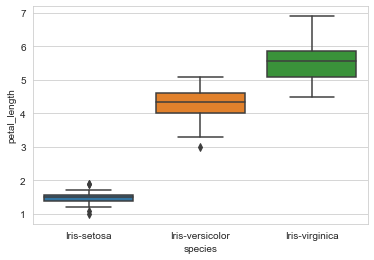

In [29]:
sns.boxplot(x="species",y="petal_length",data=dataframe)
plt.show()

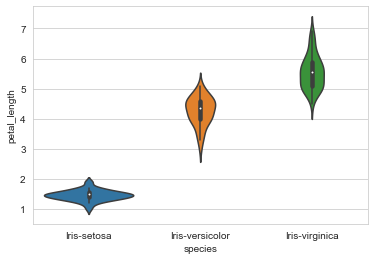

In [31]:
sns.violinplot(x="species",y="petal_length",data=dataframe,size=10)
plt.show()

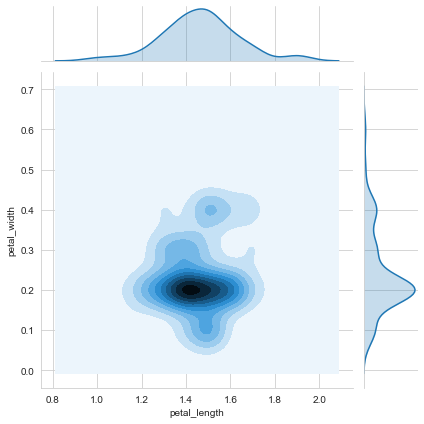

In [36]:
sns.jointplot(x="petal_length",y="petal_width",data=iris_setosa,kind="kde")
plt.show()